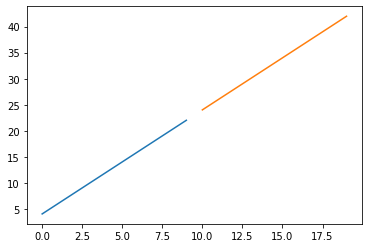

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create some data representing a line equation
m = 2
b = 4
X = tf.constant(range(10), dtype=tf.float32)
Y = tf.constant(m*X + b)
plt.plot(X.numpy(), Y.numpy())
# Now create some test data
X_test = tf.constant(range(10,20), dtype=tf.float32)
Y_test = tf.constant(m*X_test+b)
plt.plot(X_test.numpy(), Y_test.numpy())


# The loss function
1. Create a test prediction model to compare with.
2. Define the Error function to be train against

In [ ]:
# Define a model to compare with: We will use the mean
Y_mean = Y.numpy().mean()
def prediction_mean(X):
    y_hat = Y_mean * len(X)
    return y_hat

We will use the MSE as error function
$\frac{1}{m}\sum(\bar{Y_{i}}-Y_{i})^{2}$

where $\bar{Y} =  w_{0}x + w_{1}$

In [13]:
def loss_mse(X,Y, w0,w1):
    Y_hat = w0 * X + w1 
    square_error = (Y_hat - Y)**2
    loss = tf.reduce_mean(square_error)
    return loss

# Gradient calculation

In [14]:
def compute_gradient(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        loss = loss_mse(X,Y, w0, w1)
    return tape.gradient(loss,[w0,w1])

# Training loop

In [18]:
# define parameters of training
TRAINING_RATE = 0.02
STEPS = 1000
MSG = "STEP {step} - loss: {loss}, w0: {w0}, w1: {w1}\n"
#Initial weight values
w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

for step in range(0, STEPS + 1):
    #Perform update of weights  
    dw0, dw1 = compute_gradient(X,Y, w0, w1)    
    w0.assign_sub(TRAINING_RATE * dw0)
    w1.assign_sub(TRAINING_RATE * dw1)

    #Log loss every 100 steps
    if step % 100 == 0:
        loss = loss_mse(X, Y, w0, w1)
        print(MSG.format(step=step, loss=loss, w0=w0.numpy(), w1=w1.numpy()))



STEP 0 - loss: 9.290387153625488, w0: 2.999999523162842, w1: 0.5199999213218689

STEP 100 - loss: 0.37615299224853516, w0: 2.181767463684082, w1: 2.86021089553833

STEP 200 - loss: 0.03879265859723091, w0: 2.0583724975585938, w1: 3.633969783782959

STEP 300 - loss: 0.004000724758952856, w0: 2.0187456607818604, w1: 3.882453203201294

STEP 400 - loss: 0.0004125874547753483, w0: 2.0060198307037354, w1: 3.9622514247894287

STEP 500 - loss: 4.255077146808617e-05, w0: 2.0019330978393555, w1: 3.987877368927002

STEP 600 - loss: 4.388386059872573e-06, w0: 2.0006208419799805, w1: 3.9961068630218506

STEP 700 - loss: 4.5260603087626805e-07, w0: 2.000199317932129, w1: 3.9987499713897705

STEP 800 - loss: 4.66923744113501e-08, w0: 2.0000641345977783, w1: 3.999598741531372

STEP 900 - loss: 4.8035495581189025e-09, w0: 2.0000205039978027, w1: 3.999871015548706

STEP 1000 - loss: 5.125004309824988e-10, w0: 2.000006675720215, w1: 3.999958038330078



# Use our test data to validate (use the loss function)

In [19]:
# Check how much loss you get now with the w0, w1
loss = loss_mse(X_test, Y_test, w0,w1)
print(loss)

tf.Tensor(3.4142438e-09, shape=(), dtype=float32)
